# Preliminary Analysis



In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

# File to Load 
MPIData_LPR = "Resources/MPI_USInflowLPRs_1999_2017.csv"
UNData = "Resources/UN_USMigrationFlows_1980_2013.csv"

# Read the Data
df_MPIData_LPR = pd.read_csv(MPIData_LPR)
df_UN = pd.read_csv(UNData)

#Combine data
df_UN_new = df_UN[['ISO','AreaName']]
df_UN_new.columns = ['ISO','Continent']
#Combine data 
df_migration = pd.merge(df_MPIData_LPR, df_UN_new, on= "ISO", how = "left")
df_migration.head()

,Country,WEO,ISO,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Continent
0,Afghanistan,512.0,AFG,877.0,1011.0,1202.0,1759.0,1252.0,2137.0,4749.0,...,3165.0,2017.0,1648.0,1617.0,2196.0,10527.0,8328.0,12513.0,19538.0,Asia
1,Albania,914.0,ALB,3695.0,4755.0,4358.0,3765.0,3362.0,3840.0,5947.0,...,5137.0,4711.0,3612.0,3364.0,3186.0,3828.0,4653.0,5773.0,5722.0,Europe
2,Algeria,612.0,DZA,789.0,906.0,875.0,1030.0,759.0,805.0,1115.0,...,1485.0,1305.0,1364.0,1369.0,1241.0,1669.0,1775.0,2180.0,2139.0,Africa
3,American Samoa,NaN,NaN,11.0,7.0,28.0,26.0,16.0,12.0,15.0,...,19.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceania
4,American Samoa,NaN,NaN,11.0,7.0,28.0,26.0,16.0,12.0,15.0,...,19.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe


In [2]:
#Get list of columns
df_migration.columns

Index(['Country', 'WEO', 'ISO', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Continent'],
      dtype='object')

In [3]:
df_migration.count()

Country      868
WEO          186
ISO          186
1999         766
2000         768
2001         767
2002         768
2003         706
2004         707
2005         771
2006         739
2007         678
2008         676
2009         677
2010         680
2011         648
2012         650
2013         586
2014         712
2015         712
2016         712
2017         711
Continent    865
dtype: int64

In [4]:
#Drop territories without an ISO
clean_migration = df_migration.dropna(axis=0, subset=['ISO'])
clean_migration.head()

,Country,WEO,ISO,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Continent
0,Afghanistan,512.0,AFG,877.0,1011.0,1202.0,1759.0,1252.0,2137.0,4749.0,...,3165.0,2017.0,1648.0,1617.0,2196.0,10527.0,8328.0,12513.0,19538.0,Asia
1,Albania,914.0,ALB,3695.0,4755.0,4358.0,3765.0,3362.0,3840.0,5947.0,...,5137.0,4711.0,3612.0,3364.0,3186.0,3828.0,4653.0,5773.0,5722.0,Europe
2,Algeria,612.0,DZA,789.0,906.0,875.0,1030.0,759.0,805.0,1115.0,...,1485.0,1305.0,1364.0,1369.0,1241.0,1669.0,1775.0,2180.0,2139.0,Africa
34,Angola,614.0,AGO,57.0,87.0,94.0,92.0,59.0,107.0,188.0,...,173.0,148.0,148.0,187.0,143.0,148.0,154.0,198.0,209.0,Africa
66,Antigua and Barbuda,311.0,ATG,454.0,429.0,461.0,380.0,301.0,414.0,440.0,...,437.0,359.0,368.0,337.0,344.0,369.0,290.0,324.0,322.0,Latin America and the Caribbean


In [5]:
clean_migration.count()

Country      186
WEO          186
ISO          186
1999         177
2000         179
2001         178
2002         179
2003         179
2004         180
2005         182
2006         181
2007         182
2008         180
2009         181
2010         184
2011         183
2012         185
2013         183
2014         185
2015         185
2016         185
2017         184
Continent    183
dtype: int64

In [6]:
#Find rows with missing continent and subregion
#null_data = clean_migration[clean_migration.isnull().any(axis=1)]
missing_continents = pd.isnull(clean_migration['Continent'])
missing_continents

#Remove rows with no data
#reduced_migration_pd = reduced_migration_pd.dropna(how='any')
#reduced_migration_pd.head()

0      False
1      False
2      False
34     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77     False
78     False
79     False
80     False
112    False
113    False
114    False
115    False
116    False
148    False
149    False
150    False
151    False
152    False
153    False
       ...  
776    False
777    False
778    False
779    False
780    False
781    False
782    False
783    False
784     True
785    False
786    False
787    False
788    False
789    False
790    False
791    False
792    False
793    False
856    False
857    False
858    False
859    False
860    False
861    False
862    False
863    False
864    False
865    False
866    False
867    False
Name: Continent, Length: 186, dtype: bool

In [7]:
#Replace missing values 
clean_migration.loc[784,'Continent'] = 'Asia'
clean_migration.loc[775,'Continent'] = 'Africa'
clean_migration.loc[458,'Continent'] = 'Europe'
clean_migration

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Country,WEO,ISO,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Continent
0,Afghanistan,512.0,AFG,877.0,1011.0,1202.0,1759.0,1252.0,2137.0,4749.0,...,3165.0,2017.0,1648.0,1617.0,2196.0,10527.0,8328.0,12513.0,19538.0,Asia
1,Albania,914.0,ALB,3695.0,4755.0,4358.0,3765.0,3362.0,3840.0,5947.0,...,5137.0,4711.0,3612.0,3364.0,3186.0,3828.0,4653.0,5773.0,5722.0,Europe
2,Algeria,612.0,DZA,789.0,906.0,875.0,1030.0,759.0,805.0,1115.0,...,1485.0,1305.0,1364.0,1369.0,1241.0,1669.0,1775.0,2180.0,2139.0,Africa
34,Angola,614.0,AGO,57.0,87.0,94.0,92.0,59.0,107.0,188.0,...,173.0,148.0,148.0,187.0,143.0,148.0,154.0,198.0,209.0,Africa
66,Antigua and Barbuda,311.0,ATG,454.0,429.0,461.0,380.0,301.0,414.0,440.0,...,437.0,359.0,368.0,337.0,344.0,369.0,290.0,324.0,322.0,Latin America and the Caribbean
67,Argentina,213.0,ARG,1387.0,2317.0,3297.0,3661.0,3129.0,4805.0,7081.0,...,5780.0,4399.0,4473.0,4359.0,4372.0,3874.0,3730.0,4091.0,3482.0,Latin America and the Caribbean
68,Armenia,911.0,ARM,1250.0,1253.0,1762.0,1800.0,1287.0,1833.0,2591.0,...,3442.0,2979.0,2983.0,2681.0,2722.0,2913.0,2962.0,3543.0,3437.0,Asia
69,Aruba,314.0,ABW,14.0,25.0,29.0,32.0,27.0,31.0,42.0,...,38.0,49.0,39.0,54.0,45.0,40.0,38.0,23.0,47.0,Latin America and the Caribbean
70,Australia,193.0,AUS,1103.0,2044.0,2811.0,2557.0,1836.0,2604.0,3193.0,...,2622.0,2512.0,2343.0,2414.0,2759.0,2809.0,3034.0,3239.0,2906.0,Oceania
71,Austria,122.0,AUT,230.0,405.0,522.0,483.0,295.0,402.0,532.0,...,512.0,442.0,424.0,407.0,415.0,438.0,474.0,432.0,387.0,Europe


In [8]:
clean_migration.count()

Country      186
WEO          186
ISO          186
1999         177
2000         179
2001         178
2002         179
2003         179
2004         180
2005         182
2006         181
2007         182
2008         180
2009         181
2010         184
2011         183
2012         185
2013         183
2014         185
2015         185
2016         185
2017         184
Continent    186
dtype: int64

In [9]:
#Export merged file 
clean_migration.to_csv("Clean_migration.csv")

## Regular Immigration by Continent
 

In [10]:
#Group by Continent 
continent_group = clean_migration.groupby(['Continent'])
print(continent_group)

In [11]:
#Sum flows per column
imm_1999 = continent_group["1999"].sum(axis = 1, skipna = True) 
imm_2000 = continent_group["2000"].sum(axis = 1, skipna = True) 
imm_2001 = continent_group["2001"].sum(axis = 1, skipna = True)
imm_2002 = continent_group["2002"].sum(axis = 1, skipna = True)
imm_2003 = continent_group["2003"].sum(axis = 1, skipna = True)
imm_2004 = continent_group["2004"].sum(axis = 1, skipna = True)
imm_2005 = continent_group["2005"].sum(axis = 1, skipna = True)
imm_2006 = continent_group["2006"].sum(axis = 1, skipna = True)
imm_2007 = continent_group["2007"].sum(axis = 1, skipna = True)
imm_2008 = continent_group["2008"].sum(axis = 1, skipna = True)
imm_2009 = continent_group["2009"].sum(axis = 1, skipna = True)
imm_2010 = continent_group["2010"].sum(axis = 1, skipna = True)
imm_2011 = continent_group["2011"].sum(axis = 1, skipna = True)
imm_2012 = continent_group["2012"].sum(axis = 1, skipna = True)
imm_2013 = continent_group["2013"].sum(axis = 1, skipna = True)
imm_2014 = continent_group["2014"].sum(axis = 1, skipna = True)
imm_2015 = continent_group["2015"].sum(axis = 1, skipna = True)
imm_2016 = continent_group["2016"].sum(axis = 1, skipna = True)
imm_2017 = continent_group["2017"].sum(axis = 1, skipna = True)
#Create data frame with migration
imm_continent = pd.DataFrame({"1999":imm_1999, "2000":imm_2000,"2001":imm_2001, 
                             "2002":imm_2002, "2003":imm_2003, "2004":imm_2004,
                             "2005":imm_2005, "2006":imm_2006, "2007":imm_2007, 
                             "2008":imm_2008,"2009":imm_2009, "2010":imm_2010,
                             "2011":imm_2011,"2012":imm_2012, "2013":imm_2013,
                             "2014":imm_2014, "2015":imm_2015, "2016":imm_2016,
                             "2017":imm_2017})
imm_continent

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Continent,,,,,,,,,,,,,,,,,,,
Africa,36086.0,43859.0,52737.0,59122.0,47887.0,65324.0,83580.0,114452.0,92690.0,103526.0,123905.0,98875.0,98100.0,104319.0,95797.0,95822.0,98773.0,110561.0,115880.0
Asia,203518.0,270956.0,357160.0,349723.0,250448.0,342930.0,411722.0,440333.0,397834.0,399023.0,413244.0,422028.0,451557.0,429548.0,400498.0,430365.0,419239.0,462251.0,424710.0
Europe,87135.0,123636.0,164566.0,163447.0,93242.0,124003.0,163803.0,144862.0,105326.0,102661.0,104332.0,87813.0,82755.0,80757.0,85646.0,82291.0,84721.0,92283.0,83286.0
Latin America and the Caribbean,288924.0,359277.0,424270.0,429057.0,283972.0,377983.0,389837.0,487251.0,400633.0,426539.0,422368.0,376302.0,370152.0,360784.0,350502.0,339015.0,370628.0,426755.0,415488.0
Northern America,8811.0,16092.0,21815.0,19416.0,11382.0,15626.0,22061.0,18540.0,15666.0,15325.0,16321.0,13529.0,13069.0,13211.0,13500.0,11944.0,13043.0,13261.0,11893.0
Oceania,3613.0,5066.0,6002.0,5439.0,4305.0,5942.0,6487.0,7300.0,6047.0,5209.0,5501.0,5295.0,4936.0,4695.0,5253.0,5063.0,5366.0,5542.0,5025.0


In [19]:
#Set index
imm_continent= imm_continent.reset_index()
imm_continent=imm_continent.set_index('Continent')

#Collect the years
years = imm_continent.keys()

#imm_continent.plot()

Index(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

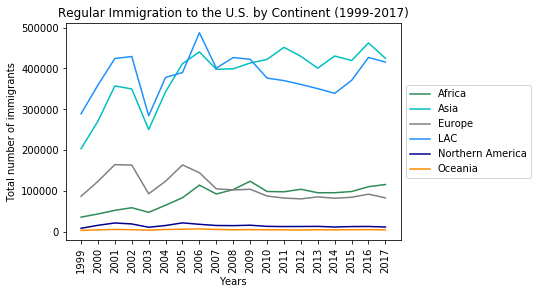

In [46]:
#Plot continents data
africa = plt.plot(years, imm_continent.loc['Africa','1999':'2017'], color="seagreen",label="Africa")
asia = plt.plot(years, imm_continent.loc['Asia','1999':'2017'], color="c",label="Asia")
europe = plt.plot(years, imm_continent.loc['Europe','1999':'2017'], color="gray",label="Europe")
lac = plt.plot(years, imm_continent.loc['Latin America and the Caribbean','1999':'2017'], color="dodgerblue",label="LAC")
na = plt.plot(years, imm_continent.loc['Northern America','1999':'2017'], color="darkblue",label="Northern America")
oceania = plt.plot(years, imm_continent.loc['Oceania','1999':'2017'], color="darkorange",label="Oceania")

#plot aesthetics
lns = africa + asia + europe + lac + na + oceania
labels = [l.get_label() for l in lns]
plt.legend(lns,labels)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Regular Immigration to the U.S. by Continent (1999-2017)')
plt.xlabel('Years')
plt.ylabel('Total number of immigrants')
plt.xticks(rotation='vertical')
plt.savefig('Output/Trends_by_cont.png') #Save picture in the correct size
plt.show()




## Top five countries with more flows

In [13]:
clean_migration.columns
#[["Country","2001","2008","2017"]
#organized_df.head()

Index(['Country', 'WEO', 'ISO', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Continent'],
      dtype='object')

In [14]:
organized_2001 = clean_migration[["Country","2001"]]
organized_2001.head()

,Country,2001
0,Afghanistan,1202.0
1,Albania,4358.0
2,Algeria,875.0
34,Angola,94.0
66,Antigua and Barbuda,461.0


### Top five in 2001

In [15]:
top_2001 = organized_2001.sort_values("2001",ascending =False)
top_2001.head()

,Country,2001
541,Mexico,205560.0
445,India,70032.0
191,China,56267.0
717,Philippines,52919.0
864,Vietnam,35419.0


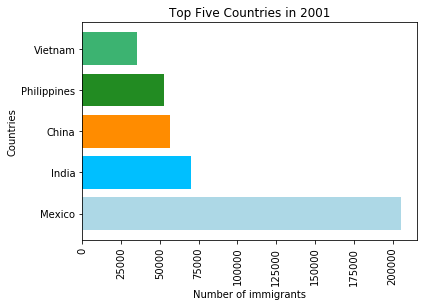

In [62]:
countries = ['Mexico', 'India', 'China', 'Philippines', 'Vietnam']
inflows_2001 = [205560, 70032, 56267, 52919, 35419]
colors = ['lightblue','deepskyblue','darkorange','forestgreen','mediumseagreen']
y_pos = np.arange(len(countries))
plt.barh(countries, inflows_2001,color=colors,align='center')
plt.title('Top Five Countries in 2001')
plt.xlabel('Number of immigrants')
plt.ylabel('Countries')
plt.xticks(rotation='vertical')
plt.savefig('Output/Top_five_2001.png')
plt.show()

### Top five countries in 2009

In [57]:
organized_2009 = clean_migration[["Country","2009"]]
top_2009 = organized_2009.sort_values("2009",ascending =False)
top_2009.head()

,Country,2009
541,Mexico,164920.0
191,China,64238.0
717,Philippines,60029.0
445,India,57304.0
295,Dominican Republic,49414.0


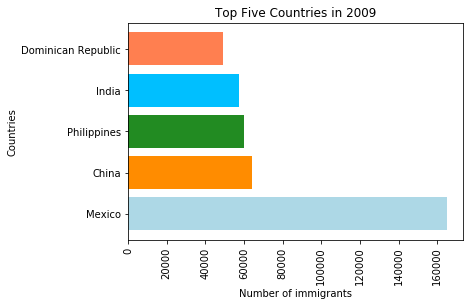

In [63]:
countries = ['Mexico','China', 'Philippines','India','Dominican Republic']
inflows_2009 = [164920, 64238, 60029, 57304, 49414]
colors = ['lightblue','darkorange','forestgreen','deepskyblue','coral']
y_pos = np.arange(len(countries))
plt.barh(countries, inflows_2009,color=colors,align='center')
plt.title('Top Five Countries in 2009')
plt.xlabel('Number of immigrants')
plt.ylabel('Countries')
plt.xticks(rotation='vertical')
plt.savefig('Output/Top_five_2009.png')
plt.show()

### Top five 2017

In [60]:
organized_2017 = clean_migration[["Country","2017"]]
top_2017 = organized_2017.sort_values("2017",ascending =False)
top_2017.head()

,Country,2017
541,Mexico,170581.0
191,China,71565.0
445,India,60394.0
295,Dominican Republic,58520.0
717,Philippines,49147.0


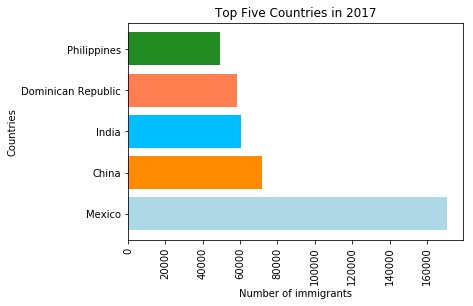

In [64]:
countries = ['Mexico','China','India','Dominican Republic','Philippines']
inflows_2017 = [170581, 71565, 60394, 58520, 49147]
colors = ['lightblue','darkorange','deepskyblue','coral','forestgreen']
y_pos = np.arange(len(countries))
plt.barh(countries, inflows_2017,color=colors,align='center')
plt.title('Top Five Countries in 2017')
plt.xlabel('Number of immigrants')
plt.ylabel('Countries')
plt.xticks(rotation='vertical')
plt.savefig('Output/Top_five_2017.png') #make it fit
plt.show()